<a href="https://colab.research.google.com/github/jennif8r/RedeNeural/blob/main/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Neurônio artificial**
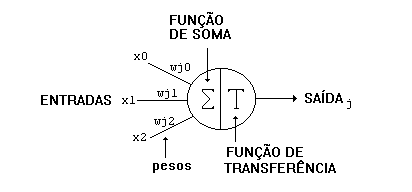

- 1943: McCulloch e Pitts




##Tipos de Rede Neural

Existe *alguns tipos de rede neural*, o primeiro modelo capaz de aprender peso sinápticos automaticamente através de um algoritmo de aprendizado supervisionado foi o *PERCEPTRON* criado em 1957. Com isso vamos começar com o Perceptron e indo progredindo.

###Uma camada (Perceptron simples)
Modelo mais simples do perceptron, constituido por uma camada capaz de resolver problemas de **classificação linear separáveis**.
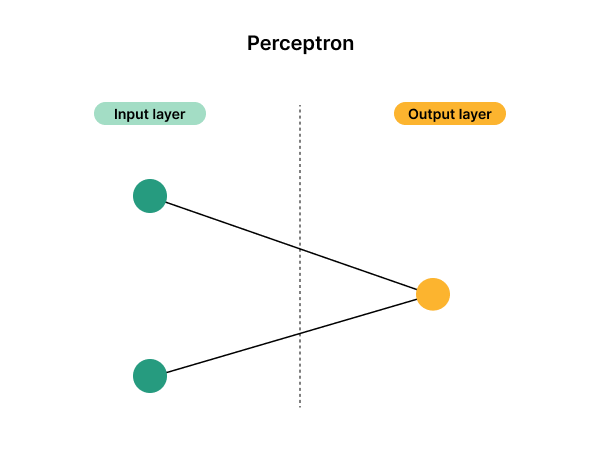

####1. **Função da Soma**

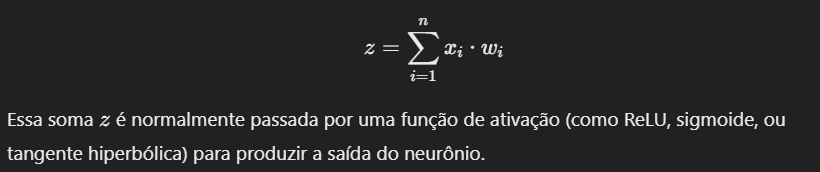
  - Z: a soma ponderada (saída antes de passar por uma função de ativação);
  - Xi: **o valor** da i-ésima entrada (input);
  - Wi: o **peso** associado à i-ésima entrada;
  - n: o número de entradas para o neurônio.


A **somatória** é um operador matemático que representa a soma de uma sequência de valores. Na notação usual, temos:

1. **Início e fim da somatória**:
   - O índice **i** começa em 1 (\(i = 1\)) e vai até **n**, onde \(n\) é o número total de elementos.

2. **Multiplicação em cada passo**:
   - Para cada valor de \(i\), multiplicamos \(Xi\) (um valor do conjunto \(X\)) pelo correspondente \(Wi\) (um valor do conjunto \(W\), que geralmente representa os pesos).

3. **Somando os resultados**:
   - Após realizar todas as multiplicações (X1* W1 + X2 * W2...+ Xn*Wn), somamos todos esses produtos.



#####2. **Função de ativação**

As funções de ativação são um elemento extremamente importante das redes neurais artificiais. Elas basicamente decidem se um neurônio deve ser ativado ou não. Ou seja, se a informação que o neurônio está recebendo é relevante para a informação fornecida ou deve ser ignorada.


######2.1 Função de ativação do Perceptron:

 -Step Function (função Degrau)
   Maior do que Zero = 1 *Caso* contrário = 0.
   Ou seja, representação "Tudo ou nada" (Binário).
    - É uma função de ativação original do perceptron (1958).Ou seja, REFERENTE ao neurônio artificial mais simples.
    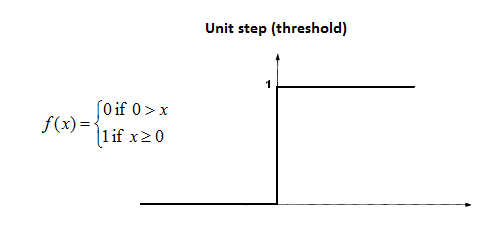

  - Podemos encontrar um neurônio artificial definido como segue abaixo, onde sabemos que a função de ativação é a step function (função degrau) REFERENTE AO PERCEPTRON:

  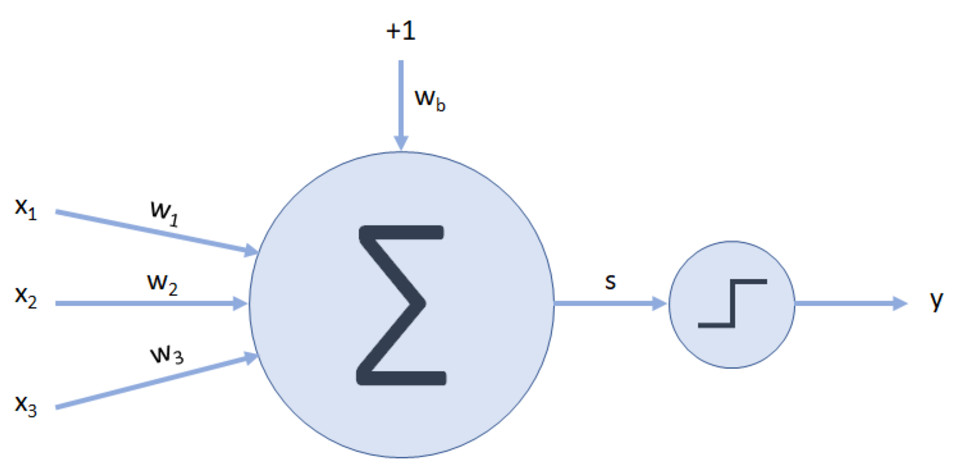

#####Exemplo feito manualmente:
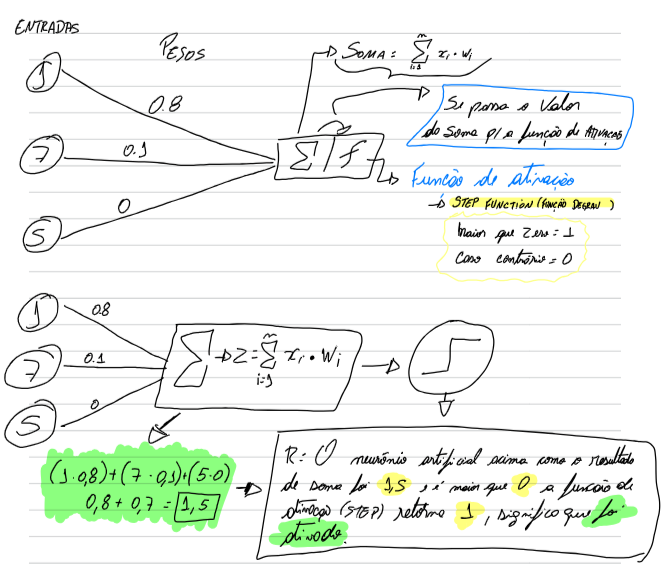

####Função de ativação: **Step Funcion (Função degrau)**
OBS: Estamos fazendo o código que  realiza a ativação de um **perceptron em uma camada simples** de uma rede neural.
 - Agora iremos fazer via código.

#####Implementação básica:

In [ ]:
entradas = [1, 7, 5]

pesos = [0.8,0.1,0]

def soma(e, p):
  s = 0
  for i in range(3):
    print("entradas", entradas[i])
    print("pesos",pesos[i])
    s += e[i] * p[i]
  return s

s = soma(entradas, pesos)
print("soma da rede neural: ", s)

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

# Passar o valor da soma para a função de ativação:
r = stepFunction(s)

print("resultado da função de ativação: ", r)

entradas 1
pesos 0.8
entradas 7
pesos 0.1
entradas 5
pesos 0
soma da rede neural:  1.5
resultado da função de ativação:  1


###### Agora iremos ultilizar a biblioteca Numpy para melhora nosso código.
 - Motivo de melhorar na nossa **função de soma**, pois o codigo acima não é a melhor forma de fazermos esse processamento principalmente quando for trabalhar com grande volume de dados (big data). Com isso a rede neural vai ser lenta, e precisamos otimizar.


In [ ]:
import numpy as np

entradas = np.array([1, 7, 5])

pesos = np.array([0.8,0.1,0])

def soma(e, p):
  return e.dot(p)  #dot_product / produto escalar

s = soma(entradas, pesos)

print("soma da rede neural: ", s)

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

# Passar o valor da soma para a função de ativação:
r = stepFunction(s)

print("resultado da função de ativação: ", r)

soma da rede neural:  1.5
resultado da função de ativação:  1


####***Ajustes dos Pesos (Perceptron usando a base do Operador Lógico E)***
O processo de *treinamento* de uma rede neural envolve o ajuste dos pesos para que a saída da rede se aproxime do resultado esperado.



***Explicação via calculo do Funcionamento (Parte teorica)***
1. Inicializamos os pesos e o bias com valores aleatórios ou zeros.
2. Calculamos a saída do perceptron aplicando a soma ponderada das entradas pelos pesos e adicionando o bias.
3. Utilizamos uma função de ativação (como o degrau) para determinar a saída binária.
4. Comparamos a saída calculada com a saída esperada (target) e calculamos o erro.
***Exemplo para adicionar que está no goodnode***

Esse processo é repetido para todas as amostras da base de dados até que os pesos sejam ajustados corretamente.

**Implementação em Python**

Ajustes dos Pesos (Perceptron usando a base do Operador Lógico E)
Agora, vamos implementar o mesmo processo descrito acima utilizando Python.

Este código irá demonstrar como o perceptron aprende a resolver o operador lógico **E**.


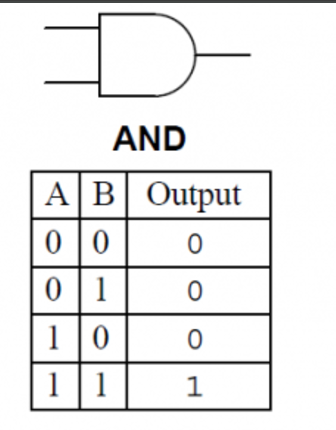

Abaixo está a implementação em Python:

**Referente a função treinamento o Algoritmo**
 - Enquanto o erro for diferente de zero
    - Para cada registro:
      - Calcula a saída com os pesos atuais
      - Compara a *saída esperada* com a *Saída calculada*, somando o *erro*
      - Para cada peso da rede:
        - Atualiz o peso - peso(n+1) = peso(n)+(taxaAprendizagem*entrada*erro)


In [ ]:
import numpy as np

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

saidas = np.array([0,0,0,1])

pesos = np.array([0.0, 0.0])

taxaAprendizagem = 0.1 #O dev que defini por padrão usar 0.1 ou 0.0001

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

def calculaSaida(registro):
  s = registro.dot(pesos)
  return stepFunction(s)

# Se colocarmos o erro = 0  a gente espera que a rede neural tenha 100% de acerto, o que em um grande conjunto de dados é impossivel.
def treinar():
  erroTotal = 1
  while(erroTotal != 0):
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calculaSaida(np.asarray(entradas[i]))
      erro = abs(saidas[i] - saidaCalculada)
      erroTotal += erro
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
        print("Peso atualizado: " + str(pesos[j]))

    print("Total de erros: " + str(erroTotal))

treinar()
print("Rede neural treinada")

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Total de erros: 1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erros: 1
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Total de erros: 1
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erros: 1
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Pe

Este código irá demonstrar como o perceptron aprende a resolver o operador lógico **OR**. Abaixo está a implementação em Python:
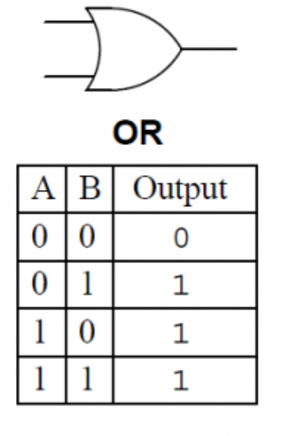

In [ ]:
import numpy as np

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

saidas = np.array([0,1,1,1])

pesos = np.array([0.0, 0.0])

taxaAprendizagem = 0.1 #O dev que defini por padrão usar 0.1 ou 0.0001

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

def calculaSaida(registro):
  s = registro.dot(pesos)
  return stepFunction(s)

# Se colocarmos o erro = 0  a gente espera que a rede neural tenha 100% de acerto, o que em um grande conjunto de dados é impossivel.
def treinar():
  erroTotal = 1
  while(erroTotal != 0):
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calculaSaida(np.asarray(entradas[i]))
      erro = abs(saidas[i] - saidaCalculada)
      erroTotal += erro
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
        print("Peso atualizado: " + str(pesos[j]))

    print("Total de erros: " + str(erroTotal))

treinar()
print("Rede neural treinada")

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erros: 3
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erros: 3
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Total de erros: 2
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Total de erros: 2
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Total de erros: 2
Peso atualizado: 0.7
P

#####Test de mesa
 - Já que encontramos o valor do peso iremos fazer o calculo na mão e ver:


-ADICIONAR O QUE ESTÁ NO GOODNOTE-

**Usando o operador logico XOR:**


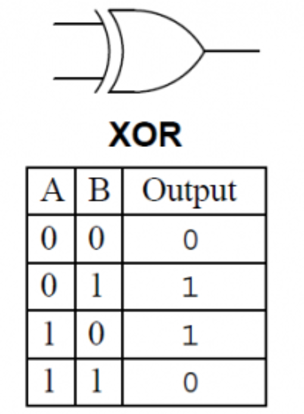

Código python:

O perceptron não consegue resolver XOR, então ele irá ficar em loop

In [ ]:
import numpy as np

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

saidas = np.array([0,1,1,0])

pesos = np.array([0.0, 0.0])

taxaAprendizagem = 0.1 #O dev que defini por padrão usar 0.1 ou 0.0001

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

def calculaSaida(registro):
  s = registro.dot(pesos)
  return stepFunction(s)

# Se colocarmos o erro = 0  a gente espera que a rede neural tenha 100% de acerto, o que em um grande conjunto de dados é impossivel.
def treinar():
  erroTotal = 1
  while(erroTotal != 0):
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calculaSaida(np.asarray(entradas[i]))
      erro = abs(saidas[i] - saidaCalculada)
      erroTotal += erro
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
        print("Peso atualizado: " + str(pesos[j]))

    print("Total de erros: " + str(erroTotal))

treinar()
print("Rede neural treinada")

A saída de streaming foi truncada nas últimas 5000 linhas.
Total de erros: 1
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Total de erros: 1
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Total de erros: 1
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.700000001927
Peso atualizado: 5348.700000001927
Total de erros: 1
Peso atualizado: 5348.7000000

KeyboardInterrupt: 

**Explicação**

Adicionar aqui a explicação que está no goodnote

**Resumo**

- Redes de camada única, como o perceptron, só resolvem problemas linearmente separáveis.

- Redes de camada única com funções de ativação diferenciáveis podem aproximar problemas mais complexos, mas ainda têm limitações.

- Para resolver problemas não linearmente separáveis de forma robusta, é necessário usar redes com mais de uma camada (redes multicamadas).